<a href="https://colab.research.google.com/github/Sandanu87/Nextgen-Analytics-/blob/main/TestCSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
data = files.upload()

Saving test.csv to test.csv


In [5]:
data = pd.read_csv('test.csv')

In [6]:
data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,batticaloa,2686.5,3582,12537
1,10089,batticaloa,1717.56,2576.34,9446.58
2,38329,batticaloa,854.04,1242.24,5201.88
3,11376,batticaloa,1638.12,2320.67,9282.68
4,12410,batticaloa,1039.09,1518.67,5435.24


In [7]:
data.describe()

,Customer_ID
count,40749.000000
mean,20375.000000
std,11763.367396
min,1.000000
25%,10188.000000
50%,20375.000000
75%,30562.000000
max,40749.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [9]:
str_columns = ['luxury_sales','fresh_sales','dry_sales']

for column in str_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [10]:
data['Customer_ID'].duplicated().sum()

np.int64(0)

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data['Customer_ID'].nunique()

40749

In [14]:
data.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,2
fresh_sales,1
dry_sales,1


<Axes: >

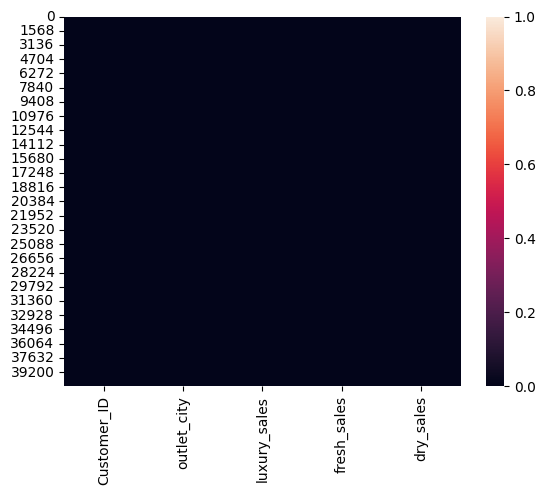

In [15]:
cols = data.columns
sns.heatmap(data[cols].isnull())

In [16]:
luxury_mean = data['luxury_sales'].mean()
fresh_mean = data['fresh_sales'].mean()
dry_mean = data['dry_sales'].mean()

data['luxury_sales'].fillna(luxury_mean, inplace=True)
data['fresh_sales'].fillna(fresh_mean, inplace=True)
data['dry_sales'].fillna(dry_mean, inplace=True)

<ipython-input-16-175527e35051>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['luxury_sales'].fillna(luxury_mean, inplace=True)
<ipython-input-16-175527e35051>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [18]:
data.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer_ID   40749 non-null  int64  
 1   outlet_city   40749 non-null  object 
 2   luxury_sales  40749 non-null  float64
 3   fresh_sales   40749 non-null  float64
 4   dry_sales     40749 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [20]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
encoded_data = encode.fit_transform(data['outlet_city'])

encoded_df = pd.DataFrame(encoded_data, columns=['outlet_city_encoded'])
data = pd.concat([data, encoded_df], axis=1)
data = data.drop('outlet_city', axis=1)

In [21]:
data.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,outlet_city_encoded
0,33574,2686.50,3582.00,12537.00,25
1,10089,1717.56,2576.34,9446.58,25
2,38329,854.04,1242.24,5201.88,25
3,11376,1638.12,2320.67,9282.68,25
4,12410,1039.09,1518.67,5435.24,25


In [22]:
data['outlet_city_encoded'].unique()

array([25,  1,  2,  3,  0,  4,  5,  6,  7,  8,  9, 26, 10, 11, 12, 14, 13,
       16, 15, 17, 18, 19, 21, 20, 22, 23, 24])

In [23]:
data['outlet_city_encoded'].nunique()

27

In [25]:
total_sales = data['luxury_sales'] + data['fresh_sales'] + data['dry_sales']
data['total_sales'] = total_sales

In [26]:
from sklearn.preprocessing import RobustScaler

numeric_features = ['dry_sales', 'luxury_sales', 'fresh_sales', 'total_sales']

data_log = np.log1p(data[numeric_features])

scaler = RobustScaler()

scaled_data = scaler.fit_transform(data_log)

data_scaled = pd.DataFrame(scaled_data, columns=numeric_features, index=data.index)

data_final = pd.concat([data.drop(columns=numeric_features), data_scaled], axis=1)

In [27]:
data_final.head()

,Customer_ID,outlet_city_encoded,dry_sales,luxury_sales,fresh_sales,total_sales
0,33574,25,0.870993,0.680769,0.043177,0.992113
1,10089,25,0.666486,-0.003755,-0.188982,0.430665
2,38329,25,0.235406,-1.072498,-0.702737,-0.701342
3,11376,25,0.653839,-0.076210,-0.262603,0.364480
4,12410,25,0.267111,-0.772564,-0.561252,-0.538639


In [ ]:
from

In [ ]:
param_dist = {'learning_rate': 0.2, 'max_features':'sqrt'}

